In [1]:
import xarray as xr
import hvplot.xarray
import numpy as np

import gsw

# Load and prep rapid mooring data

In [2]:
ds_tsg = xr.open_dataset("../rapid-geostrophic-reconstruction/data/ts_gridded.nc")
ds_tsg = ds_tsg.rename({"depth": "z"})
ds_tsg = ds_tsg.assign_coords(z=-abs(ds_tsg.pressure))
ds_tsg = ds_tsg.set_coords(["pressure", ])
ds_tsg.z.attrs["units"] = "m"
ds_tsg.z.attrs["long_name"] = "vertical position"
ds_tsg

/gxfs_home/geomar/smomw507/.conda/envs/amoc_recons/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<xarray.Dataset>
Dimensions:          (time: 13057, z: 242)
Coordinates:
  * time             (time) datetime64[ns] 2004-04-02 ... 2022-02-15
    pressure         (z) float64 0.0 20.0 40.0 ... 4.78e+03 4.8e+03 4.82e+03
  * z                (z) float64 -0.0 -20.0 -40.0 ... -4.8e+03 -4.82e+03
Data variables: (12/18)
    TG_west          (z, time) float64 ...
    SG_west          (z, time) float64 ...
    TG_wb3           (z, time) float64 ...
    SG_wb3           (z, time) float64 ...
    TG_east          (z, time) float64 ...
    SG_east          (z, time) float64 ...
    ...               ...
    TG_east_flag     (z, time) float64 ...
    SG_east_flag     (z, time) float64 ...
    TG_marwest_flag  (z, time) float64 ...
    SG_marwest_flag  (z, time) float64 ...
    TG_mareast_flag  (z, time) float64 ...
    SG_mareast_flag  (z, time) float64 ...
Attributes:
    Title:                         RAPID streamfunction
    Institution:                   National Oceanography Centre,UK
    Website:                       http://www.rapid.ac.uk/rapidmoc
    Acknowledgement:               The RAPID 26N AMOC monitoring project is f...
    Created_by:                    Ben Moat
    Creation_date:                 08-Sep-2023
    Principle_investigator:        Ben Moat
    Principle_investigator_email:  ben.moat@noc.ac.uk
    DOI:                           doi: 10.5285/04c79ece-3186-349a-e063-6c86a...

In [3]:
_TG = ds_tsg[["TG_west", "TG_wb3", "TG_marwest", "TG_mareast", "TG_east"]].to_array("pos")
_TG = _TG.assign_coords(pos=range(5))
_TG = _TG.assign_coords(name=(("pos", ), ["west", "wb3", "marwest", "mareast", "east"]))
_TG = _TG.assign_coords(lon=(("pos", ), [-76.74, -76.50, -50.57, -41.21, -16.23,]))
_TG = _TG.assign_coords(lat=(("pos", ), [26.52, 26.50, 24.52, 24.52, 26.99, ]))
_TG = _TG.rename("temperature")
_TG.attrs["long_name"] = "Temperature"
_TG.attrs["units"] = "degC"

_SG = ds_tsg[["SG_west", "SG_wb3", "SG_marwest", "SG_mareast", "SG_east"]].to_array("pos")
_SG = _SG.assign_coords(pos=range(5))
_SG = _SG.assign_coords(name=(("pos", ), ["west", "wb3", "marwest", "mareast", "east"]))
_SG = _SG.assign_coords(lon=(("pos", ), [-76.74, -76.50, -50.57, -41.21, -16.23,]))
_SG = _SG.assign_coords(lat=(("pos", ), [26.52, 26.50, 24.52, 24.52, 26.99, ]))
_SG = _SG.rename("salinity")
_SG.attrs["long_name"] = "Salinity"
_SG.attrs["units"] = "psu"

ds_pos_obs = xr.merge([_TG, _SG])

ds_pos_obs = ds_pos_obs.assign_coords(pos=ds_pos_obs.name)

ds_pos_obs

<xarray.Dataset>
Dimensions:      (time: 13057, z: 242, pos: 5)
Coordinates:
  * time         (time) datetime64[ns] 2004-04-02 ... 2022-02-15
    pressure     (z) float64 0.0 20.0 40.0 60.0 ... 4.78e+03 4.8e+03 4.82e+03
  * z            (z) float64 -0.0 -20.0 -40.0 ... -4.78e+03 -4.8e+03 -4.82e+03
  * pos          (pos) <U7 'west' 'wb3' 'marwest' 'mareast' 'east'
    name         (pos) <U7 'west' 'wb3' 'marwest' 'mareast' 'east'
    lon          (pos) float64 -76.74 -76.5 -50.57 -41.21 -16.23
    lat          (pos) float64 26.52 26.5 24.52 24.52 26.99
Data variables:
    temperature  (pos, z, time) float64 nan nan nan nan ... 2.405 2.405 2.405
    salinity     (pos, z, time) float64 nan nan nan nan ... 34.89 34.89 34.89
Attributes:
    Title:                         RAPID streamfunction
    Institution:                   National Oceanography Centre,UK
    Website:                       http://www.rapid.ac.uk/rapidmoc
    Acknowledgement:               The RAPID 26N AMOC monitoring project is f...
    Created_by:                    Ben Moat
    Creation_date:                 08-Sep-2023
    Principle_investigator:        Ben Moat
    Principle_investigator_email:  ben.moat@noc.ac.uk
    DOI:                           doi: 10.5285/04c79ece-3186-349a-e063-6c86a...
    long_name:                     Temperature
    units:                         degC

## Load and prepare model data

In [4]:
ds_model_groups = xr.open_dataset("../rapid-geostrophic-reconstruction/data/mooring_groups.nc")
ds_model_groups = ds_model_groups.rename({"western_mooring": "field"})
ds_model_groups

<xarray.Dataset>
Dimensions:        (deptht: 46, mooring: 4, time_counter: 5844, variable: 2)
Coordinates:
  * deptht         (deptht) float32 3.047 9.454 16.36 ... 5.625e+03 5.875e+03
    nav_lat        (mooring, deptht) float32 ...
    nav_lon        (mooring, deptht) float32 ...
    time_centered  (time_counter) datetime64[ns] ...
  * time_counter   (time_counter) datetime64[ns] 2004-01-01T12:00:00 ... 2019...
    x              (mooring, deptht) int64 ...
    y              (mooring, deptht) int64 ...
  * variable       (variable) object 'temp' 'salt'
    moorings       (mooring, deptht) object ...
    i_moorings     (mooring, deptht) int64 ...
  * mooring        (mooring) object 'western_mooring' ... 'eastern_ridge_moor...
Data variables:
    field          (mooring, variable, time_counter, deptht) float32 ...

In [5]:
ds_pos_sim = xr.Dataset(
    {
        "temperature": ds_model_groups.field.sel(variable="temp", drop=True).rename({
            "time_counter": "time",
            "deptht": "z",
            "mooring": "pos",
            "nav_lon": "lon",
            "nav_lat": "lat",
        }),
        "salinity": ds_model_groups.field.sel(variable="salt", drop=True).rename({
            "time_counter": "time",
            "deptht": "z",
            "mooring": "pos",
            "nav_lon": "lon",
            "nav_lat": "lat",
        }),
    },
)
ds_pos_sim = ds_pos_sim.assign_coords(z=-abs(ds_pos_sim.z))
ds_pos_sim = ds_pos_sim.interp(
    z=ds_pos_obs.z,
    method="slinear",
    kwargs={"fill_value": "extrapolate"},
)
ds_pos_sim = ds_pos_sim.drop_vars(["x", "y", "i_moorings", "moorings", "time_centered", "pos"])
ds_pos_sim = ds_pos_sim.assign_coords(
    name=(("pos", ), ['west', 'east', 'marwest', 'mareast']),
    pos=(("pos", ), ['west', 'east', 'marwest', 'mareast']),
)
ds_pos_sim = ds_pos_sim.assign_coords(
    lon=ds_pos_sim.lon.mean("z"),
    lat=ds_pos_sim.lat.mean("z"),
)
ds_pos_sim = xr.merge([v.transpose(*ds_pos_obs.dims) for k, v in ds_pos_sim.data_vars.items()])

ds_pos_sim = ds_pos_sim.assign_coords(pos=ds_pos_sim.name)


ds_pos_sim

<xarray.Dataset>
Dimensions:      (pos: 4, time: 5844, z: 242)
Coordinates:
    lat          (pos) float64 26.55 26.56 24.51 24.52
    lon          (pos) float64 -76.69 -17.45 -49.8 -41.2
  * time         (time) datetime64[ns] 2004-01-01T12:00:00 ... 2019-12-31T12:...
  * z            (z) float64 -0.0 -20.0 -40.0 ... -4.78e+03 -4.8e+03 -4.82e+03
    pressure     (z) float64 0.0 20.0 40.0 60.0 ... 4.78e+03 4.8e+03 4.82e+03
    name         (pos) <U7 'west' 'east' 'marwest' 'mareast'
  * pos          (pos) <U7 'west' 'east' 'marwest' 'mareast'
Data variables:
    temperature  (time, z, pos) float64 24.31 19.13 24.47 ... 1.816 1.507 1.868
    salinity     (time, z, pos) float64 36.67 36.58 37.3 ... 34.88 34.85 34.88
Attributes:
    standard_name:       sea_water_potential_temperature
    long_name:           temperature
    units:               degC
    online_operation:    average
    interval_operation:  300 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 300 s) time_counter: mean

In [6]:
ds_pos_sim_miss = (
    ds_pos_sim.sel(time=ds_pos_obs.time.values, method="nearest")
    .assign_coords(
        time=ds_pos_obs.time.values,
        lon=ds_pos_obs.lon,
        lat=ds_pos_obs.lat,
    )
    .where(~ds_pos_obs.temperature.isnull())
)
ds_pos_sim_miss = ds_pos_sim_miss.sortby("lon")
ds_pos_sim_miss

<xarray.Dataset>
Dimensions:      (time: 13057, z: 242, pos: 4)
Coordinates:
  * time         (time) datetime64[ns] 2004-04-02 ... 2022-02-15
  * z            (z) float64 -0.0 -20.0 -40.0 ... -4.78e+03 -4.8e+03 -4.82e+03
  * pos          (pos) <U7 'west' 'marwest' 'mareast' 'east'
    lat          (pos) float64 26.52 24.52 24.52 26.99
    lon          (pos) float64 -76.74 -50.57 -41.21 -16.23
    pressure     (z) float64 0.0 20.0 40.0 60.0 ... 4.78e+03 4.8e+03 4.82e+03
    name         (pos) <U7 'west' 'marwest' 'mareast' 'east'
Data variables:
    temperature  (time, z, pos) float64 nan nan nan nan ... 1.69 nan nan 1.816
    salinity     (time, z, pos) float64 nan nan nan nan ... 34.87 nan nan 34.88
Attributes:
    standard_name:       sea_water_potential_temperature
    long_name:           temperature
    units:               degC
    online_operation:    average
    interval_operation:  300 s
    interval_write:      1 d
    cell_methods:        time: mean (interval: 300 s) time_counter: mean

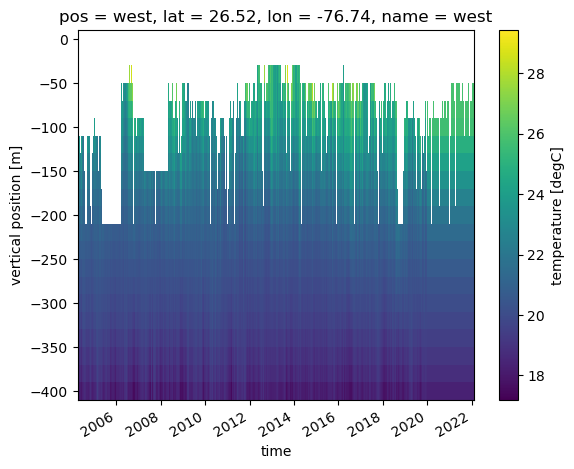

In [7]:
ds_pos_sim_miss.isel(pos=0).sel(z=slice(None, -400)).temperature.plot(x="time", y="z")

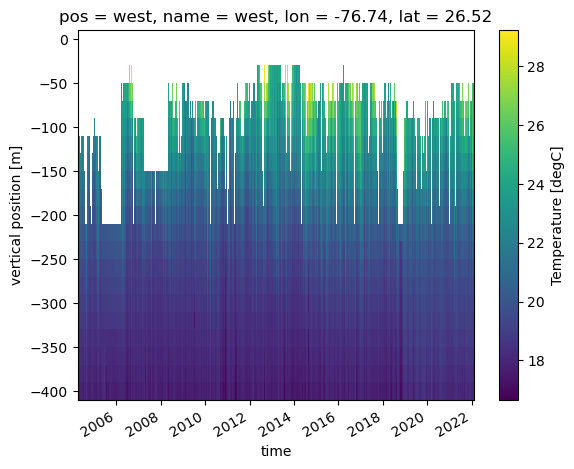

In [8]:
ds_pos_obs.isel(pos=0).sel(z=slice(None, -400)).temperature.plot(x="time", y="z")

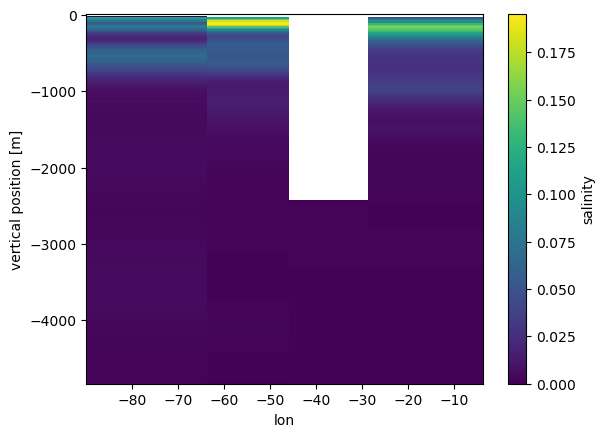

In [9]:
ds_pos_sim_miss.salinity.std("time").plot(x="lon", y="z")

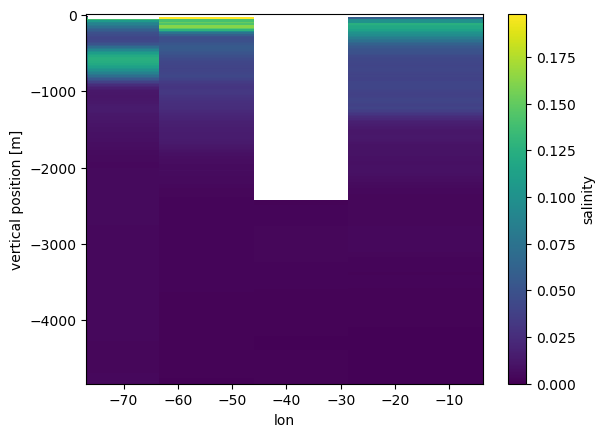

In [10]:
ds_pos_obs.salinity.std("time").plot(x="lon", y="z")

## Calc density

In [11]:
def add_ct_and_rho(ds_pos):

    ds_pos["ct"] = gsw.conversions.CT_from_pt(ds_pos.salinity, ds_pos.temperature)
    ds_pos["ct"].attrs["long_name"] = "Conservative Temperature"
    ds_pos["ct"].attrs["units"] = "degC"
    
    ds_pos["rho"] = gsw.density.rho(ds_pos.salinity, ds_pos.ct, ds_pos.pressure)
    ds_pos["rho"].attrs["long_name"] = "Density"
    ds_pos["rho"].attrs["units"] = "kg/m3"
    
    return ds_pos

In [12]:
ds_pos_sim_miss = add_ct_and_rho(ds_pos_sim_miss)
ds_pos_obs = add_ct_and_rho(ds_pos_obs)

# Thermal wind

$$\frac{\partial v}{\partial z} = - \frac{g}{\rho_0\,f} \frac{\partial\rho}{\partial x}$$
$$V|_{X,Z} = \int_X{\rm d}x\int_Z{\rm d}z\int_Z{\rm d}z \frac{\partial v}{\partial z}$$
$$\int_X{\rm d}x = x_1 - x_0$$
$$\frac{\partial\rho}{\partial x} \approx \frac{\rho(x_1)-\rho(x_0)}{x_1 - x_0}$$
$$V|_{X,Z} = -\frac{g}{\rho_0\,f} \int_Z{\rm d}z\,  \int_Z{\rm d}z\, (\rho(x_1) - \rho(x_0))$$

In [13]:
g = 9.81
f = 2 * 7.292116E-5 * np.sin(np.deg2rad(26.5))
rho0 = 1025.0

## Standardize

The physics is in the $\rho$ differences! Hence, we can remove the respective mean profiles from model and obs $\rho$ separately as long as we scale with the same standard deviation. We chose the simulated $\rho$ standard deviation for scaling variability.

In [14]:
from copy import deepcopy

In [15]:
rho_mean_sim = ds_pos_sim_miss.rho.mean(["pos", "time"])
rho_mean_obs = ds_pos_obs.rho.mean(["pos", "time"])
rho_std_sim = ds_pos_sim_miss.rho.std(["pos", "time", "z"]).data[()]
rho_std_obs = ds_pos_obs.rho.std(["pos", "time", "z"]).data[()]

def standardize_rho(ds_pos, rho_mean=None, rho_std=None):
    ds_pos = deepcopy(ds_pos)
    ds_pos["rho"] = (ds_pos["rho"] - rho_mean) / rho_std
    return ds_pos

ds_pos_sim_miss_std = standardize_rho(
    ds_pos_sim_miss,
    rho_mean=rho_mean_sim,  # 👀 !!
    rho_std=rho_std_sim,
)
ds_pos_obs_std = standardize_rho(
    ds_pos_obs,
    rho_mean=rho_mean_obs,  # 👀 !!
    rho_std=rho_std_sim,
)

## Calculate upper mid ocean transport with / without standardization


In [16]:
def calc_t_umo_geostrophic(
    ds_pos=None,
    zref=-4800,
):

    pos_pairs_depth_range = [
        (("west", "east"), (None, -3700)),
        (("west", "marwest"), (-3700, None)),
        (("mareast", "east"), (-3700, None)),
    ]
    
    rho_diff = xr.concat(
        [
            (
                ds_pos.sel(pos=ds_pos.name == n1).squeeze(drop=True).sel(z=slice(z0, z1)).rho
                - ds_pos.sel(pos=ds_pos.name == n0).squeeze(drop=True).sel(z=slice(z0, z1)).rho
            ).assign_coords(box="_".join((n0, n1)))
            for ((n0, n1), (z0, z1)) in pos_pairs_depth_range
        ],
        dim="box"
    )
    rho_diff

    dv_dz = (- rho_diff * g / f / rho0).sum("box").where(
        (~(- rho_diff * g / f / rho0).isnull()).sum("box") > 0
    ).rename("dv_dz_times_X")

    # _dv_dz = dv_dz.isel(time=0, z=slice(-30, None))
    _dv_dz = dv_dz.isel(z=slice(-40, None))
    dv_dz_fillup = xr.where(
        ~dv_dz.isnull(),
        dv_dz,
        (_dv_dz.isel(z=0) + _dv_dz.diff("z").ffill("z").cumsum("z")).interp(z=dv_dz.z)
    )
    # dv_dz_fillup.sel(z=slice(-500, 0)).plot()


    
    transp_umo = (-(
        ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0))
        - ((dv_dz_fillup.isel(z=slice(None, None, -1)).cumsum("z") * 20.0)).sel(z=zref, method="nearest")
    ).cumsum("z") * 20.0 / 1e6).sel(z=slice(None, -1300)).sel(z=-1000, method="nearest")
    
    return  transp_umo

In [17]:
t_umo_obs = calc_t_umo_geostrophic(ds_pos_obs)
t_umo_sim_miss = calc_t_umo_geostrophic(ds_pos_sim_miss)
t_umo_obs_std = calc_t_umo_geostrophic(ds_pos_obs_std) * rho_std_sim
t_umo_sim_miss_std = calc_t_umo_geostrophic(ds_pos_sim_miss_std) * rho_std_sim

The following should show two pairs of identical time series.

In [18]:
(
    (0 + t_umo_obs).hvplot(label="t_umo_obs")
    * (2 + t_umo_obs_std).hvplot(label="t_umo_obs_std")
    + (0 + t_umo_sim_miss).hvplot(label="t_umo_sim_miss")
    * (2 + t_umo_sim_miss_std).hvplot(label="t_umo_sim_miss_std")
).cols(1)

/gxfs_home/geomar/smomw507/.conda/envs/amoc_recons/lib/python3.9/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/gxfs_home/geomar/smomw507/.conda/envs/amoc_recons/lib/python3.9/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/gxfs_home/geomar/smomw507/.conda/envs/amoc_recons/lib/python3.9/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will alwa

:Layout
   .Overlay.I  :Overlay
      .Curve.T_umo_obs     :Curve   [time]   (dv_dz_times_X)
      .Curve.T_umo_obs_std :Curve   [time]   (dv_dz_times_X)
   .Overlay.II :Overlay
      .Curve.T_umo_sim_miss     :Curve   [time]   (dv_dz_times_X)
      .Curve.T_umo_sim_miss_std :Curve   [time]   (dv_dz_times_X)

In [21]:
(
    t_umo_obs.sel(time=slice(None, "2019")).hvplot.hist(title="obs")
    + t_umo_sim_miss.sel(time=slice(None, "2019")).hvplot.hist(title="sim")
).cols(1)

:Layout
   .NdOverlay.I  :NdOverlay   [Variable]
      :Histogram   [dv_dz_times_X]   (dv_dz_times_X_count)
   .NdOverlay.II :NdOverlay   [Variable]
      :Histogram   [dv_dz_times_X]   (dv_dz_times_X_count)

### Save the umo transport and the mooring data 

In [22]:

# Mooring data
ds_pos_obs.to_netcdf("../rapid-geostrophic-reconstruction/data/ds_pos_obs.nc")
ds_pos_sim_miss.to_netcdf("../rapid-geostrophic-reconstruction/data/ds_pos_sim_miss.nc")
ds_pos_obs_std.to_netcdf("../rapid-geostrophic-reconstruction/data/ds_pos_obs_std.nc")
ds_pos_sim_miss_std.to_netcdf("../rapid-geostrophic-reconstruction/data/ds_pos_sim_miss_std.nc")

# UMO 
t_umo_obs.to_netcdf("../rapid-geostrophic-reconstruction/data/t_umo_obs.nc")
t_umo_sim_miss.to_netcdf("../rapid-geostrophic-reconstruction/data/t_umo_sim_miss.nc")
t_umo_obs_std.to_netcdf("../rapid-geostrophic-reconstruction/data/t_umo_obs_std.nc")
t_umo_sim_miss_std.to_netcdf("../rapid-geostrophic-reconstruction/data/t_umo_sim_miss_std.nc")
